### TPC Benchmarking  
Results Plotting  

In [1]:
import config

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

In [2]:
fpb = "/home/colin/data/tpc_logs/"

In [3]:
test = "TPC-H"
scale_factor = "100"

In [19]:
# H 100GB Scale Factor Queries
fps = ["bq_h_query_times-100GB-h_100GB_01-default-2020-05-01 09:54:14.099669.csv",
       "bq_h_query_times-100GB-h_100GB_02-partition by time-2020-05-01 23:23:17.050195.csv",
       "bq_h_query_times-100GB-h_100GB_03-partition by time & int range-2020-05-01 23:48:05.744723.csv",
       "bq_h_query_times-100GB-h_100GB_04-cluster & partition by time & int range-2020-05-02 00:12:02.612155.csv",
       "sf_h_query_times-h_100GB_01-default-20200503-222731.csv"
      ]

In [20]:
if "query" in fps[0]:
    x_type = "query_n"
else:
    x_type = "stream_p"

In [21]:
def parse(fp, x_type):
    x_type = {"q":"query_n", "s":"stream_p"}[x_type]
    df = pd.read_csv(fp)
    df.t0 = pd.to_datetime(df.t0)
    df.t1 = pd.to_datetime(df.t1)
    df["dt"] = df.t1 - df.t0
    df["dt_s"] = df.dt.dt.total_seconds()
    return df

In [22]:
df = pd.DataFrame(None)
for _fp in fps:
    _df = parse(fpb + _fp, "q")
    df = pd.concat([df, _df])

In [23]:
df = df.sort_values(by="bq_dataset")

In [24]:
df["description"] = df.db + "_" + df.desc

In [32]:
a = 1588545095.771359
b = 1588545095.9072554

In [33]:
a - b

-0.1358964443206787

In [34]:
pd.to_datetime(a)

Timestamp('1970-01-01 00:00:01.588545095')

In [31]:
df[df.db == "sf"]

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,dt,dt_s,query_plan,cost,description
1,sf,h,100,h_100GB_01,01 default,2,1970-01-01 00:00:01.588544838,1970-01-01 00:00:01.588544838,-1,NaN,00:00:00,0.000000e+00,NaN,0.000231,sf_01 default
2,sf,h,100,h_100GB_01,01 default,3,1970-01-01 00:00:01.588544838,1970-01-01 00:00:01.588544838,-1,NaN,00:00:00,0.000000e+00,NaN,0.000070,sf_01 default
3,sf,h,100,h_100GB_01,01 default,4,1970-01-01 00:00:01.588544838,1970-01-01 00:00:01.588544838,-1,NaN,00:00:00,0.000000e+00,NaN,0.000059,sf_01 default
4,sf,h,100,h_100GB_01,01 default,5,1970-01-01 00:00:01.588544838,1970-01-01 00:00:01.588544839,-1,NaN,00:00:00.000000,1.000000e-09,NaN,0.000165,sf_01 default
5,sf,h,100,h_100GB_01,01 default,6,1970-01-01 00:00:01.588544839,1970-01-01 00:00:01.588544839,-1,NaN,00:00:00,0.000000e+00,NaN,0.000051,sf_01 default
6,sf,h,100,h_100GB_01,01 default,7,1970-01-01 00:00:01.588544839,1970-01-01 00:00:01.588544839,-1,NaN,00:00:00,0.000000e+00,NaN,0.000214,sf_01 default
7,sf,h,100,h_100GB_01,01 default,8,1970-01-01 00:00:01.588544839,1970-01-01 00:00:01.588544840,-1,NaN,00:00:00.000000,1.000000e-09,NaN,0.000277,sf_01 default
8,sf,h,100,h_100GB_01,01 default,9,1970-01-01 00:00:01.588544840,1970-01-01 00:00:01.588544840,-1,NaN,00:00:00,0.000000e+00,NaN,0.000220,sf_01 default
9,sf,h,100,h_100GB_01,01 default,10,1970-01-01 00:00:01.588544840,1970-01-01 00:00:01.588544840,-1,NaN,00:00:00,0.000000e+00,NaN,0.000132,sf_01 default
10,sf,h,100,h_100GB_01,01 default,11,1970-01-01 00:00:01.588544840,1970-01-01 00:00:01.588544841,-1,NaN,00:00:00.000000,1.000000e-09,NaN,0.000132,sf_01 default


In [25]:
dfp_dt = df.pivot(index=x_type, columns="description", values="dt_s")
dfp_bp = df.pivot(index=x_type, columns="description", values="bytes_processed")

In [26]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

In [27]:
dfp_bp = dfp_bp.apply(bytes_to_TebiByte)

### Plot Results

In [28]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [29]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=6)

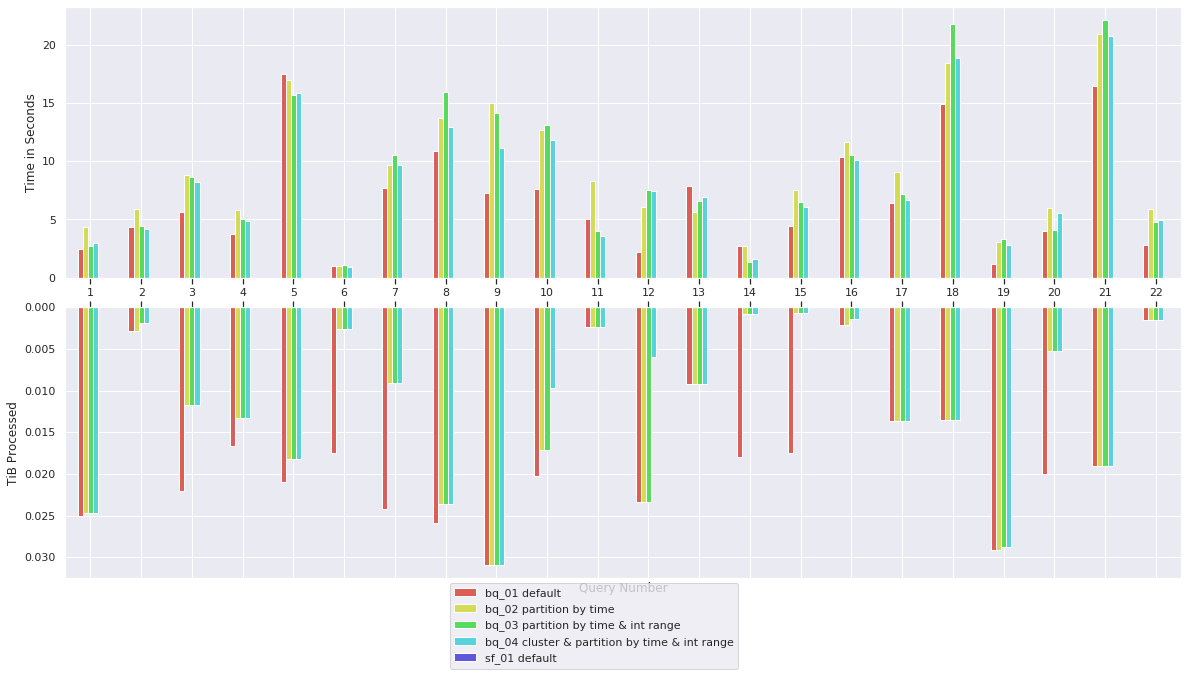

In [30]:
plot_name = "{}_{}GB_{}_comparison.png".format(test, scale_factor, x_type)

# invert bytes processed for plotting
_dfp_bp = dfp_bp.copy() * -1
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=False, color=color_palette)
ax2 = _dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(20, 10.5, forward=True)

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[])

ax2.set_ylabel("TiB Processed")
ax2.set_xlabel("Query Number")
ticks =  ax2.get_yticks()
ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
ax2.set_yticklabels(ticks);
ax2.xaxis.tick_top()

plt.subplots_adjust(hspace=0.11)
fig.legend(handles, labels, loc="lower center")
plt.savefig(config.fp_plots + config.sep + plot_name, bbox_to_anchor='tight')
print();

In [16]:
dfp_dt.sum()

description
bq_01 default                                    1.464890e+02
bq_02 partition by time                          1.993270e+02
bq_03 partition by time & int range              1.912720e+02
bq_04 cluster & partition by time & int range    1.777950e+02
sf_01 default                                    2.000000e-08
dtype: float64

In [17]:
dfp_bp.sum()

description
bq_01 default                                    3.759159e-01
bq_02 partition by time                          2.745481e-01
bq_03 partition by time & int range              2.723794e-01
bq_04 cluster & partition by time & int range    2.475311e-01
sf_01 default                                   -8.913048e-11
dtype: float64

In [18]:
dfp_bp.sum() * 5

description
bq_01 default                                    1.879580e+00
bq_02 partition by time                          1.372741e+00
bq_03 partition by time & int range              1.361897e+00
bq_04 cluster & partition by time & int range    1.237656e+00
sf_01 default                                   -4.456524e-10
dtype: float64